In [1]:
import scipy.special as scis
import numpy as np
from statistics import mean
from numpy import linalg as la
from matplotlib import pyplot as plt
from math import pi,exp
from math import sqrt as sq

In [2]:
def T22(k,x,xi,ni):
    r_ = la.norm(x-xi)
    D = k*r_ * scis.hankel2(1,k*r_)
    return 1j/(4*r_) * D * gam_k__n_k(x,xi,ni)

In [3]:
def G22(k,x,xi,beta,rho):
    r_ = la.norm(x-xi)
    return 1/(1j*4*rho) * scis.hankel2(0,k*r_)/beta**2

In [4]:
def gam_k__n_k(x,xi,ni):
    r_ = la.norm(x-xi)
    return (x[0]-xi[0])/r_ * ni[0] + (x[1]-xi[1])/r_ * ni[1]

In [5]:
f = 0.5 # Hertz
w = 2*pi*f # rad/s
beta = 0.3 # km/s
lambd = beta/f # long de onda en kilometros
k = w / beta # 1/km
rho = 0.3
mu = beta**2 * rho # 2nd Lame constant
# fuente puntual (antiplana) en
XI = np.array([0,-1])
# receptor 
XX =  np.array([0,1])
print(f"En la frecuencia {f} Hz, \lambda = {lambd} km")

En la frecuencia 0.5 Hz, \lambda = 0.6 km


In [6]:
chunk=5; L=1;
vert=np.zeros((chunk,2))
vert[:,0]=np.linspace(0,L,chunk)
xis=0.5*(vert[1:]+vert[:-1])

In [7]:
a=vert[1:]-vert[:-1]
norms=la.norm(a,axis=1)
nu=np.zeros_like(a)
nu[:,0]=-a[:,1]/norms
nu[:,1]=a[:,0]/norms

In [8]:
xis

array([[0.125, 0.   ],
       [0.375, 0.   ],
       [0.625, 0.   ],
       [0.875, 0.   ]])

In [9]:
def Int_T22_uniforme_en_xi(n,l,k,vert,xis,norm):
    if n==l:
        return 0.0
    
    gau_i=[-0.774597,0,0.774597]
    w_i=[0.555556,0.888889,0.555556]
    
    b=vert[l,0];a=vert[l+1,0]; 
    xi_x_gau=[(b-a)/2*gau+(a+b)/2 for gau in gau_i]
    
    b=vert[l,1];a=vert[l+1,1]; 
    xi_z_gau=[(b-a)/2*gau+(a+b)/2 for gau in gau_i]
    
    Xi_gau=[[xi_x_gau[i],xi_z_gau[i]] for i in range(len(gau_i))]
    Xi_gau=np.array(Xi_gau)
    
    L=la.norm(vert[l]-vert[n])
    Int=0.0
    for i in range(len(gau_i)):
        Int += L/2 * w_i[i]*T22(k,xis[n],Xi_gau[i],norm[n])
    return Int

In [10]:
# para cada punto de colocacion (renglon), la integral de las fuentes sobre la superficie
Mat=np.zeros([len(xis),len(xis)])
Mat = Mat + 0j*Mat
print(f"A de tamaño {Mat.shape}")
for n in range(len(xis)):
    for l in range(len(xis)):
        if n==l:
            Mat[n,l]=0.5+0j
        else:
            Mat[n,l]=Int_T22_uniforme_en_xi(n,l,k,vert,xis,nu)

A de tamaño (4, 4)


In [11]:
Mat

array([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j]])

In [12]:
# fuente
Fue=np.zeros([len(xis),1])
Fue = Fue + 0j*Fue
print(f"B de tamaño {Fue.shape}")
for l in range(len(xis)):
    Fue[l]=T22(k, xis[l], XI, nu[l])

B de tamaño (4, 1)


In [13]:
Fue

array([[ 0.5938187 -0.23627792j],
       [ 0.3128476 -0.49515899j],
       [-0.28428119-0.41699779j],
       [-0.35052867+0.23467256j]])

In [14]:
# encontrar amplitudes phi de la densidad de fuerza: phi dS
phi = np.linalg.solve(Mat,Fue)

In [15]:
# graficar phi
phi_gX=[abs(phi[i]) * nu[i,0] for i in range(len(xis))]
phi_gZ=[abs(phi[i]) * nu[i,1] for i in range(len(xis))]

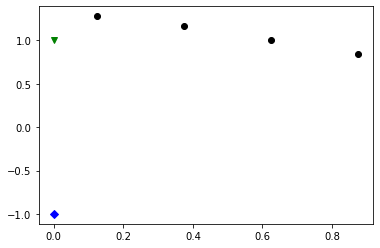

In [16]:
plt.scatter(xis[:,0],phi_gZ,color='black')
plt.plot(XI[0],XI[1],'bD')# fuente
plt.plot(XX[0],XX[1],'gv')# receptor
plt.show()

In [18]:
# ahora para construir la solucion en un observador cualquiera se hace

V = G22(k,XX,XI,beta,rho)
for i_xi in range(len(xis)):
    V+=phi[i_xi]*G22(k,XX,xis[i_xi,:],beta,rho)

print(f"En {XX}, V = {V}")

En [0 1], V = [2.29960793+0.60748759j]
